In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("23tanmay/BioDistillGPT2")
model = AutoModelForCausalLM.from_pretrained("23tanmay/BioDistillGPT2")

tokenizer_config.json:   0%|          | 0.00/873 [00:00<?, ?B/s]

c:\Python310\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\suyash\.cache\huggingface\hub\models--23tanmay--BioDistillGPT2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

<h1>Nested Multi-arm Bandits</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Modified Thompson Sampling Algorithm</h2>

<h3>Methods to Caculate Score/Reward</h3>

In [2]:
def linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs):
    # return sampled_ratings + sampled_experiences + sampled_distances + sampled_availabilities + sampled_costs
    return sampled_ratings + sampled_experiences + sampled_distances + sampled_availabilities

def inverted_linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs):
    # return sampled_ratings + sampled_experiences + (1 / (sampled_distances + 1)) + sampled_availabilities + (1 / (sampled_costs + 1))
    return sampled_ratings + sampled_experiences + (1 / (sampled_distances + 1)) + sampled_availabilities

def normalized_linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs, max_ratings, max_experiences, max_distances, max_availabilities, max_costs):
    # Normalize ratings to [0, 1] range
    normalized_ratings = sampled_ratings / max_ratings

    # Normalize experiences to [0, 1] range
    normalized_experiences = sampled_experiences / max_experiences

    # Normalize distances to [0, 1] range
    normalized_distances = 1 - (sampled_distances / max_distances )

    # Normalize costs to [0, 1] range
    normalized_costs = 1 - (sampled_costs / max_costs)

    # Normalize availabilities to [0, 1] range
    normalized_availabilities = sampled_availabilities / max_availabilities

    # return normalized_ratings + normalized_experiences + normalized_distances + normalized_availabilities + normalized_costs
    return normalized_ratings + normalized_experiences + normalized_distances + normalized_availabilities

def weighted_normalized_linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs, max_ratings, max_experiences, max_distances, max_availabilities, max_costs):
    # Normalize ratings to [0, 1] range
    normalized_ratings = sampled_ratings / max_ratings

    # Normalize experiences to [0, 1] range
    normalized_experiences = sampled_experiences / max_experiences

    # Normalize distances to [0, 1] range
    normalized_distances = 1 - (sampled_distances / max_distances )

    # Normalize costs to [0, 1] range
    normalized_costs = 1 - (sampled_costs / max_costs)

    # Normalize availabilities to [0, 1] range
    normalized_availabilities = sampled_availabilities / max_availabilities

    # Define weights for each term
    weight_ratings = 0.3
    weight_experiences = 0.3
    weight_distances = 0.2
    weight_availabilities = 0.1
    weight_costs = 0.1

    # return (weight_ratings * normalized_ratings) + (weight_experiences * normalized_experiences) + (weight_distances * normalized_distances) + (weight_availabilities * normalized_availabilities) + (weight_costs * normalized_costs)
    return (weight_ratings * normalized_ratings) + (weight_experiences * normalized_experiences) + (weight_distances * normalized_distances) + (weight_availabilities * normalized_availabilities)


<h3>Thompson Sampling Algorithm methods - Select arm and Update reward</h3>

In [4]:
class ThompsonSampling:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        
        # Initialize parameters for each arm
        self.alpha_rating = np.ones(num_arms)
        self.beta_rating = np.ones(num_arms)
        
        self.alpha_experience = np.ones(num_arms)
        self.beta_experience = np.ones(num_arms)
        
        self.mu_distance = np.zeros(num_arms)
        self.sigma_distance = np.ones(num_arms)
        
        self.alpha_availability = np.ones(num_arms)
        self.beta_availability = np.ones(num_arms)
        
        self.mu_cost = np.zeros(num_arms)
        self.sigma_cost = np.ones(num_arms)
        
        # Initialize counts for each arm
        # self.arm_counts = {i: 0 for i in range(num_arms)}
        
    def select_arm(self, doctors_for_speciality, speciality):
        # Filter doctors based on the given speciality
        # doctors_for_speciality = data[data['Doctor Speciality'] == speciality]
        num_doctors = len(doctors_for_speciality)
        
        # Sample a reward estimate for each doctor from the posterior distributions
        sampled_ratings = np.random.beta(self.alpha_rating[:num_doctors], self.beta_rating[:num_doctors])
        sampled_experiences = np.random.gamma(self.alpha_experience[:num_doctors], 1 / self.beta_experience[:num_doctors])
        sampled_distances = np.random.normal(self.mu_distance[:num_doctors], self.sigma_distance[:num_doctors])
        sampled_availabilities = np.random.beta(self.alpha_availability[:num_doctors], self.beta_availability[:num_doctors])
        sampled_costs = np.random.lognormal(self.mu_cost[:num_doctors], self.sigma_cost[:num_doctors])
        
        # Find maximum possible values from the dataset
        max_ratings = doctors_for_speciality['Ratings'].max()
        max_experiences = doctors_for_speciality['Experience'].max()
        max_distances = doctors_for_speciality['Distance from Patient'].max()
        max_costs = doctors_for_speciality['Cost of Services'].max()
        max_availabilities = doctors_for_speciality['Availability'].max()

        #Find score for an arm
        score = weighted_normalized_linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs, max_ratings, max_experiences, max_distances, max_availabilities, max_costs)
        # print(score)

        # Select doctor with the highest score
        selected_doctor_index = np.argmax(score)
        selected_doctor = doctors_for_speciality.iloc[selected_doctor_index]
        
        return selected_doctor
    
    def update(self, arm, rating, experience, distance, availability, cost):
        # Update prior parameters for each arm based on observed data
        # Update parameters for ratings
        self.alpha_rating[arm] += rating
        self.beta_rating[arm] += max(1 - rating, 0.01)
        
        # Update parameters for experience
        self.alpha_experience[arm] += experience
        self.beta_experience[arm] += 1
        
        # Update parameters for distance
        self.mu_distance[arm] = (self.sigma_distance[arm]**2 * self.mu_distance[arm] + distance) / (self.sigma_distance[arm]**2 + 1)
        self.sigma_distance[arm] = self.sigma_distance[arm]
        
        # Update parameters for availability
        self.alpha_availability[arm] += availability
        self.beta_availability[arm] += 1 - availability
        
        # Update parameters for cost
        # No conjugate prior for log-normal distribution, use numerical methods or approximations
        # For simplicity, let's skip updating parameters for cost

<h3>Iterating over Trials/budget</h3>

In [9]:
# Load data from CSV
doctor_df = pd.read_csv('../Datasets/doctors_data_multireward.csv')

# Specify the doctor speciality for which you want recommendations
speciality_to_select = 'Cardiology'

doctors_for_speciality = doctor_df[doctor_df['Doctor Speciality'] == speciality_to_select].reset_index(drop=True)

# print(doctors_for_speciality)

In [14]:
num_arms = len(doctors_for_speciality)
thompson = ThompsonSampling(num_arms)

# Number of trials
num_trials = 1000

# Initialize dictionary to store counts of selections for selected doctors
selected_doctor_counts = {}

# Initialize regret list
regret_list = []

# Simulate selecting a doctor and updating parameters based on observed data for multiple trials
for _ in range(num_trials):
    selected_doctor = thompson.select_arm(doctors_for_speciality, speciality_to_select)
    selected_doctor_index = doctors_for_speciality[doctors_for_speciality['Doctor Name'] == selected_doctor['Doctor Name']].index[0]
    
    # Increment count for the selected doctor
    if selected_doctor_index in selected_doctor_counts:
        selected_doctor_counts[selected_doctor_index] += 1
    else:
        selected_doctor_counts[selected_doctor_index] = 1
    
    # Simulate observing data for the selected doctor
    rating = selected_doctor['Ratings']
    experience = selected_doctor['Experience']
    distance = selected_doctor['Distance from Patient']
    availability = selected_doctor['Availability']
    cost = selected_doctor['Cost of Services']
    
    # Update prior parameters based on observed data
    thompson.update(selected_doctor_index, rating, experience, distance, availability, cost)
    
    # print("Selected Doctor:")
    # print(selected_doctor)

    # Calculate regret and append to list
    optimal_reward = doctors_for_speciality[doctors_for_speciality['Doctor Speciality'] == speciality_to_select]['Ratings'].max()
    regret = optimal_reward - rating
    regret_list.append(regret)

# Sort selected doctors based on count of selections in decreasing order
sorted_selected_doctors = sorted(selected_doctor_counts.items(), key=lambda x: x[1], reverse=True)

# Print counts of selections for selected doctors of 'Cardiologist' speciality
topk = 5
print("\n Recommended 'Cardiologist' doctors (sorted by count in decreasing order):")
for doctor_index, count in sorted_selected_doctors[:topk]:
    doctor_info = doctors_for_speciality.iloc[doctor_index]
    print(f"Doctor Name: {doctor_info['Doctor Name']}, Ratings: {doctor_info['Ratings']}, Experience: {doctor_info['Experience']}, Distance: {doctor_info['Distance from Patient']}")
    # print(f"Doctor Speciality: {doctor_info['Doctor Speciality']}, Doctor Name: {doctor_info['Doctor Name']}, Count: {count}, Ratings: {doctor_info['Ratings']}, Experience: {doctor_info['Experience']}, Distance: {doctor_info['Distance from Patient']}, Availability: {doctor_info['Availability']}, Cost: {doctor_info['Cost of Services']}")



 Recommended 'Cardiologist' doctors (sorted by count in decreasing order):
Doctor Name: Dr. James Brown, Ratings: 5.0, Experience: 24.8, Distance: 5.78
Doctor Name: Dr. Julie Garner, Ratings: 4.35, Experience: 8.28, Distance: 4.13
Doctor Name: Dr. Jacob Olson, Ratings: 8.29, Experience: 8.02, Distance: 1.33
Doctor Name: Dr. Kiara Clark, Ratings: 6.04, Experience: 3.35, Distance: 6.24
Doctor Name: Dr. Rebecca Wong, Ratings: 5.98, Experience: 5.61, Distance: 5.82


<h3>Regret Analysis</h3>

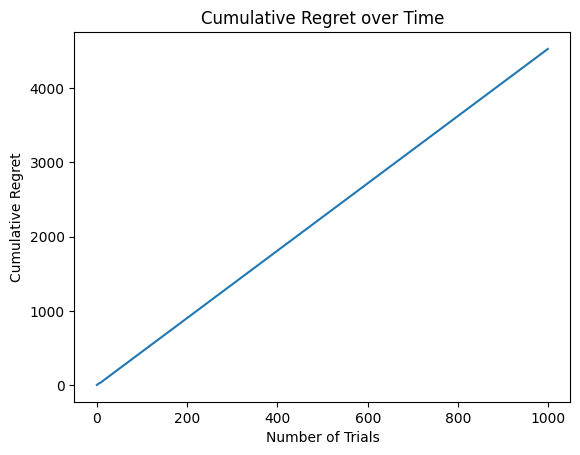

In [65]:
# Calculate cumulative regret
cumulative_regret = np.cumsum(regret_list)

# Plot cumulative regret
import matplotlib.pyplot as plt

plt.plot(cumulative_regret)
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time')
plt.show()

<p>Linear regret shows that we need to update the rewards of doctors as we proceed in Number of trials, to get sub-linear regret.</p>

<h3>Analysis of Algorithm using following metrics</h3>

<h4>Average Reciprocal Hit Rate</h4>

In [66]:
# Initialize an empty list to store the scores of each doctor
doctor_scores = []

# Find maximum possible values from the dataset
max_ratings = doctors_for_speciality['Ratings'].max()
max_experiences = doctors_for_speciality['Experience'].max()
max_distances = doctors_for_speciality['Distance from Patient'].max()
max_costs = doctors_for_speciality['Cost of Services'].max()
max_availabilities = doctors_for_speciality['Availability'].max()

# Iterate over all doctors with the specified speciality
for index, doctor in doctors_for_speciality[doctors_for_speciality['Doctor Speciality'] == speciality_to_select].iterrows():
    # Extract relevant attributes for scoring
    sampled_ratings = doctor['Ratings']
    sampled_experiences = doctor['Experience']
    sampled_distances = doctor['Distance from Patient']
    sampled_availabilities = doctor['Availability']
    sampled_costs = doctor['Cost of Services']
    
    # Calculate score for the current doctor
    score = normalized_linear_combination(sampled_ratings, sampled_experiences, sampled_distances, sampled_availabilities, sampled_costs, max_ratings, max_experiences, max_distances, max_availabilities, max_costs)
    # print(score)

    # Append doctor and score to the list
    doctor_scores.append((doctor, score))

# Sort doctors based on their scores in descending order
def sort_by_score(data):
  return sorted(data, key=lambda x: x[1], reverse=True)

sorted_doctor_scores = sort_by_score(doctor_scores.copy())

# print(sorted_doctor_scores)

# Print the final list of doctors ordered by their scores
for doctor in sorted_doctor_scores:
    print(f"Doctor Name: {doctor[0]['Doctor Name']}, Score: {doctor[1]}")


Doctor Name: Dr. Brian Friedman, Score: 3.32044123247878
Doctor Name: Dr. Kaitlyn Murphy, Score: 3.3048241392699893
Doctor Name: Dr. Gary Jones, Score: 3.297685503338733
Doctor Name: Dr. Nichole Patton, Score: 3.2826387715718575
Doctor Name: Dr. Heather Hall, Score: 3.2165885755362718
Doctor Name: Dr. Carrie Carpenter, Score: 3.204829423709995
Doctor Name: Dr. Rebecca Johnson, Score: 3.1853592188328927
Doctor Name: Dr. George Carney, Score: 3.172662791375438
Doctor Name: Dr. Debra Valdez, Score: 3.1451386792177183
Doctor Name: Dr. Charles Nguyen, Score: 3.134651237504958
Doctor Name: Dr. Manuel Bennett, Score: 3.118774896760621
Doctor Name: Dr. Matthew Gomez, Score: 3.087772646921324
Doctor Name: Dr. Penny Holland, Score: 3.0868915104984223
Doctor Name: Dr. Christine Torres, Score: 3.069940338851762
Doctor Name: Dr. Caleb Taylor, Score: 3.0663022930051156
Doctor Name: Dr. Alyssa Norris, Score: 3.0647707088009133
Doctor Name: Dr. Elizabeth Reyes, Score: 3.0576574769726235
Doctor Name: D

In [68]:
top_k = min(10, len(sorted_selected_doctors))
top_k_recommended_doctors = sorted_selected_doctors[:top_k]
# print(len(sorted_doctor_scores))

# for top k recommended doctors, find their rank in reward list - sorted_doctor_scores
ranks = []
for doctor_index, count in top_k_recommended_doctors:
    doctor_info = doctors_for_speciality.iloc[doctor_index]
    cur_rank = 1
    for dr in sorted_doctor_scores:
        if((dr[0]['Doctor Name'] == doctor_info['Doctor Name']) and (dr[0]['Experience'] == doctor_info['Experience'])):
            break
        else:
            cur_rank += 1
    ranks.append(cur_rank)

print(ranks)

[335, 2928, 8708, 2382, 9399, 4211, 8723, 523, 149, 1150]


In [72]:
def average_reciprocal_hit_rate(rank_list):
    reciprocal_hit_rates = [1 / rank for rank in rank_list if rank != 0]
    if reciprocal_hit_rates:
        return np.mean(reciprocal_hit_rates)
    else:
        return 0

ranks2 = []
for i in range(1, len(ranks)+1):
    ranks2.append(i)

max_hit_rate = average_reciprocal_hit_rate(ranks2)
observed_hit_rate = average_reciprocal_hit_rate(ranks)
print(f"max hit rate: {max_hit_rate}, observed_hit_rate: {observed_hit_rate}")

max hit rate: 0.2928968253968254, observed_hit_rate: 0.0013812784437232646
